In [24]:
from keras.utils import load_img, save_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import numpy as np
import cv2

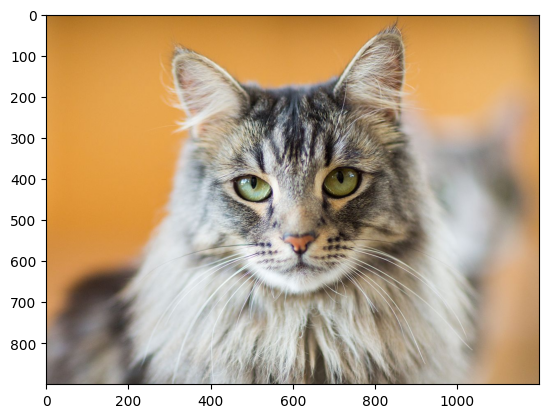

In [25]:
filename = 'cat.jpg'
hsvFilename = 'hsv_' + filename
img = load_img(filename)
plt.imshow(img)

In [26]:
(width, height) = img.size
print((width, height))

img_array = img_to_array(img)
print(img_array.shape)

(1200, 900)
(900, 1200, 3)


In [27]:
def RGB_to_HSV(R, G, B):
    V = max(R, G, B)
    m = min(R, G, B)
    C = V - m
    L = V - C/2
    Sv = 0
    Sl = 0
    H = 0
    if C == 0:
        return (H, Sv, V)
    if L != 0 and L != 1:
        Sl = (V - L)/min(L, 1-L)
    elif V == R:
        H = 60*(((G - B)/C) % 6)
    elif V == G:
        H = 60*((B - R)/C + 2)
    elif V == B:
        H = 60*((R - G)/C + 4)
    if V != 0:
        Sv = C/V
        
    return (H/360, Sv, V)

print(RGB_to_HSV(10, 2, 3))
print(RGB_to_HSV(123, 45, 111))
print(RGB_to_HSV(0, 0, 24))
print(RGB_to_HSV(255, 255, 255))

(0.0, 0.8, 10)
(0.0, 0.6341463414634146, 123)
(0.0, 1.0, 24)
(0, 0, 255)


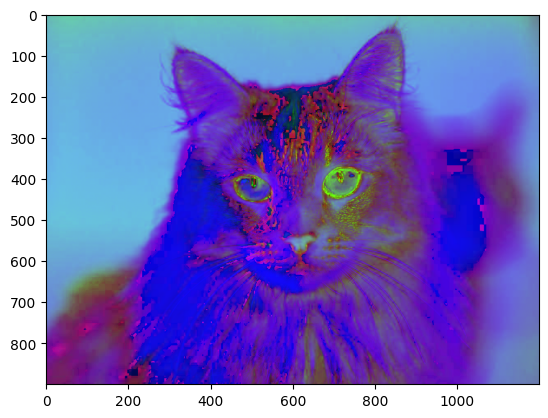

In [28]:
# RGB -> HSV su dung ham co san trong thu vien cv2
hsv_img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

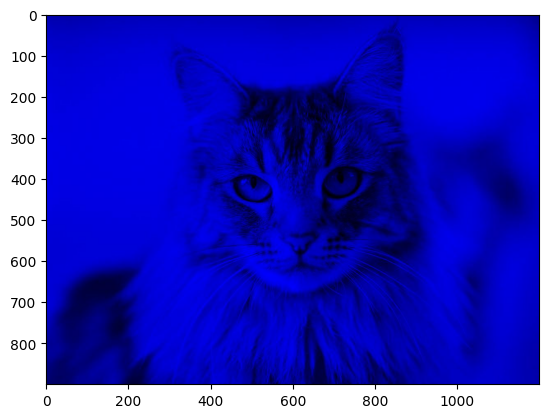

In [29]:
# Xu ly tung pixel 1 dua tren ham tu code (RGB -> HSV)
for i in range(height):
    for j in range(width):
        img_array[i][j] = RGB_to_HSV(*img_array[i][j])
        # Thac mac: Em gan mau cho pixel nhu the nay da dung chua ha Thay?, tai em thay no khac so voi khi dung ham
        # san co trong cv2

save_img(hsvFilename, img_array)
hsvImgSelf = load_img(hsvFilename)
plt.imshow(hsvImgSelf)

In [30]:
print(img_array[1][1]) # RGB -> HSV cua ham tu code
print(hsv_img[1][1]) # RGB -> HSV cua ham co trong thu vien cv2

[  0.    0.7 180. ]
[104 179 180]
